# HSMA 3B: Exercise 3 - Importing Files and Basic Plots with Geopandas

*The first cell only needs to be run if running in colab!* 

In [ ]:
!git clone https://github.com/hsma-programme/h6_3b_advanced_qgis_mapping_python.git
%cd /content/h6_3b_advanced_qgis_mapping_python/h6_3b_advanced_qgis_and_mapping_in_python/solutions

Import the required packages.

In [21]:
import geopandas
import pandas as pd
import numpy as np

## Core

### 1. Importing a geojson

Import the stats19 dataframe from before (stats_19_counts_by_msoa_normalised_3857.geojson)

In [16]:
stats_19_gdf = geopandas.read_file("../datasets/exercise_3/stats_19_counts_by_msoa_normalised_3857.geojson")
stats_19_gdf.head()

,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,total_number_of_collisions_2018_2022,total_number_of_casualties_by_casualty_lsoa_2018_2022,...,pedestrian_casualties_2018_2022_per_1000_occ,horse_rider_casualties_2018_2022_per_1000_occ,car_occupant_casualties_2018_2022_per_1000_occ,snow_collisions_2018_2022_per_1000_occ,fog_or_mist_collisions_2018_2022_per_1000_occ,darkness_collisions_2018_2022_per_1000_occ,daylight_collisions_2018_2022_per_1000_occ,summer_collisions_2018_2022_per_1000_occ,winter_collisions_2018_2022_per_1000_occ,geometry
0,E02000001,City of London 001,City of London 001,532378,181354,-0.093570,51.5156,7e1c3fbc-cc47-4e16-a505-d89e93921c28,970,40,...,26.604498,0.0,4.845493,0.548546,0.548546,28.707259,59.974401,25.690254,18.924849,"MULTIPOLYGON (((-10774.149 6714377.691, -10739..."
1,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189693,0.138759,51.5866,9f32701c-7edc-4f73-b8c2-a1afac813fbb,78,86,...,0.906032,0.0,8.801450,0.517732,0.517732,3.882992,6.342221,2.718095,2.976961,"MULTIPOLYGON (((16484.761 6727544.350, 16482.0..."
2,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188522,0.138150,51.5761,7687f18e-6c8e-4afb-9c98-a9e633e00dd6,218,157,...,4.801707,0.0,13.426996,0.533523,0.533523,6.224435,13.249155,5.157389,4.623866,"MULTIPOLYGON (((16767.626 6725085.822, 16517.8..."
3,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186418,0.176830,51.5564,67259638-dce5-461c-82f7-8fbac8335b66,34,81,...,1.053265,0.0,5.266326,0.601866,0.601866,1.504664,3.761661,1.504664,1.504664,"MULTIPOLYGON (((20603.102 6721814.898, 20482.6..."
4,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186827,0.144269,51.5607,dadad0f1-384f-4686-9535-5026812db2a9,71,131,...,1.138520,0.0,5.882353,0.474383,0.474383,1.802657,4.933586,1.992410,1.518027,"MULTIPOLYGON (((16684.350 6722400.609, 16782.0..."


Plot the dataframe.

<Axes: >

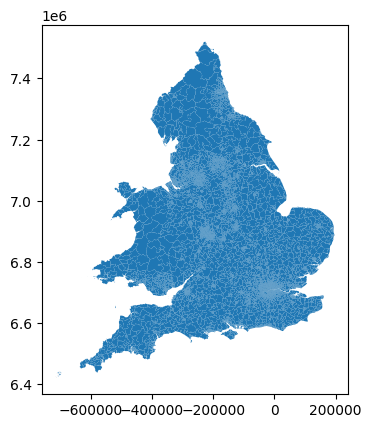

In [8]:
stats_19_gdf.plot()

### 2. Creating a geopandas dataframe from a csv

Import the dataframe of incidents with coordinates (stats19_collisions_point_data_2022.csv) using pandas.

In [11]:
stats_19_point_df = pd.read_csv("../datasets/exercise_3/stats19_collisions_point_data_2022.csv")

C:\Users\Sammi\AppData\Local\Temp\ipykernel_48884\4225284432.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  stats_19_point_df = pd.read_csv("../datasets/exercise_3/stats19_collisions_point_data_2022.csv")


Turn this into a geodataframe, using ESPG:3857 as the coordinate reference system.

In [12]:
stats_19_point_gdf = geopandas.GeoDataFrame(
    stats_19_point_df,
    geometry = geopandas.points_from_xy(
        stats_19_point_df['longitude'],
        stats_19_point_df['latitude']),
        crs = 'EPSG:3857'
)

Plot the points, colouring them by ~~incident type~~ accident severity.

<Axes: >

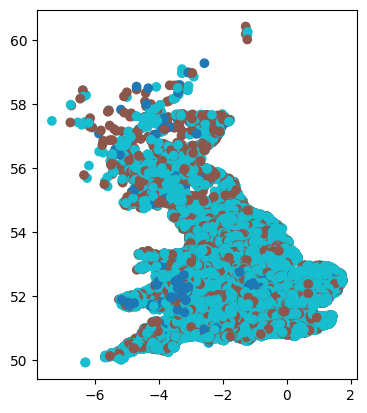

In [17]:
stats_19_point_gdf.plot(column='accident_severity')

# Extension

### Joining a geopandas dataframe to a pandas dataframe

Load in the dataframe of clients in Oxford (oxford_smoker_df.csv) who have reported that they are smokers using Pandas. 

(don't worry - this is a fake dataset!)

In [18]:
smokers_df = pd.read_csv("../datasets/exercise_3/oxford_smoker_df.csv")

Let's take a look at the first 5 rows of this dataframe.

In [19]:
smokers_df.head()

,ID,Age,Gender,Postcode
0,P45025,70,Male (including trans man),OX277SQ
1,P62315,82,Female (including trans woman),OX8 8JQ
2,P27023,85,Male (including trans man),OX7 3JX
3,P44993,37,Male (including trans man),OX3 7BB
4,P48244,84,Male (including trans man),OX160SX


This dataframe only contains the postcodes of the clients. We want to visualise counts of smokers by LSOA to help us think about where we might place some smoking cessation services - but our database doesn't have a table available to do the postcode-LSOA lookup. 

Instead, we're going to use an application-programming-interface (api) to get this data. We will send it the list of postcodes in the format it expects, and we will then turn the data it sends back into a dataframe and join this up to our smokers_df. 

Just run the code below to get a dataframe containing the LSOA for the postcodes in this dataset. It may take a little while to run!

In [22]:
import requests
import numpy as np

# Find the unique postcodes so we only request the
# data once for each postcode rather than once per
# line of patient data
postcode_list = smokers_df['Postcode'].unique()

# Create an empty list for our results
results = []

# Iterate through the postcodes 100 at a time, returning the data from the API
for i in range(int(np.ceil(len(postcode_list)/100))):

    postcode_list_filtered = postcode_list[i*100:(((i+1)*100)-1)]
    print(f"Collecting postcodes {i*100} to {(((i+1)*100)-1)}")

    # Send API request, passing in your postcodes as a list
    postcode_lookup = requests.post(
        "https://api.postcodes.io/postcodes",
        json={"postcodes": postcode_list_filtered.tolist()}
    )

    results.append(postcode_lookup)

# Turn the results into a list of pandas dataframes
# (1 dataframe per 100 results)
results_dfs = [pd.json_normalize(i.json()['result'], sep='_')
for i in results]

# join all of our dataframes into a single dataframe.
postcodes_df = pd.concat(results_dfs)

Take a look at the contents of this dataframe using the 'head' method. Try looking at the first 20 lines instead of the first 5 this time. 

In [23]:
postcodes_df.head()

,query,result_postcode,result_quality,result_eastings,result_northings,result_country,result_nhs_ha,result_longitude,result_latitude,result_european_electoral_region,...,result_codes_parliamentary_constituency_2024,result_codes_ccg,result_codes_ccg_id,result_codes_ced,result_codes_nuts,result_codes_lsoa,result_codes_msoa,result_codes_lau2,result_codes_pfa,result
0,OX277SQ,OX27 7SQ,1.0,454711.0,229235.0,England,South Central,-1.205206,51.958916,South East,...,E14001090,E38000136,10Q,E58001764,TLJ14,E01028477,E02005931,E07000177,E23000029,NaN
1,OX8 8JQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OX7 3JX,OX7 3JX,1.0,434345.0,222177.0,England,South Central,-1.502261,51.897096,South East,...,E14001072,E38000136,10Q,E58001239,TLJ14,E01028776,E02005995,E07000181,E23000029,NaN
3,OX3 7BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OX160SX,OX16 0SX,1.0,445207.0,240693.0,England,South Central,-1.341997,52.062776,South East,...,E14001072,E38000136,10Q,E58001226,TLJ14,E01028430,E02005926,E07000177,E23000029,NaN


We don't need all of these columns - just one column that we can join to our dataframe on, and another for the LSOA. 

Subset the dataframe to just contain the columns 'query' and 'result_codes_lsoa'.

In [26]:
postcodes_df_subset = postcodes_df[['query', 'result_codes_lsoa']]

postcodes_df_subset.head()

,query,result_codes_lsoa
0,OX277SQ,E01028477
1,OX8 8JQ,NaN
2,OX7 3JX,E01028776
3,OX3 7BB,NaN
4,OX160SX,E01028430


Now we can join this to our dataframe using the pandas 'merge' method.

In [29]:
smokers_df_lsoas = pd.merge(
    left=smokers_df,
    right=postcodes_df_subset,
    left_on='Postcode',
    right_on='query',
    how='left'
)

smokers_df_lsoas.head()

,ID,Age,Gender,Postcode,query,result_codes_lsoa
0,P45025,70,Male (including trans man),OX277SQ,OX277SQ,E01028477
1,P62315,82,Female (including trans woman),OX8 8JQ,OX8 8JQ,NaN
2,P27023,85,Male (including trans man),OX7 3JX,OX7 3JX,E01028776
3,P44993,37,Male (including trans man),OX3 7BB,OX3 7BB,NaN
4,P48244,84,Male (including trans man),OX160SX,OX160SX,E01028430


Now we've got the LSOAs, we can count the number of patients per LSOA. 

In [35]:
smokers_counts_by_lsoa_df = smokers_df_lsoas['result_codes_lsoa'].value_counts()

smokers_counts_by_lsoa_df

result_codes_lsoa
E01028521    620
E01028522    423
E01028468    314
E01032954    307
E01028720    278
            ... 
E01017681      8
E01028611      7
E01017676      6
E01017916      6
E01031209      2
Name: count, Length: 402, dtype: int64

Now we will load in the LSOA geopackage (Lower_layer_Super_Output_Areas_2021_EW_BGC_V3.gpkg). This gives us the boundaries of each LSOA. 

Load this in using the geopandas `read_file` function. 

In [36]:
lsoa_boundaries = geopandas.read_file('../datasets/exercise_3/Lower_layer_Super_Output_Areas_2021_EW_BGC_V3.gpkg')
lsoa_boundaries.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104...."
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572...."
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071...."
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842...."
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118...."


Now we are going to join our LSOA boundaries to our data files. 

In [39]:
lsoa_df_smokers = pd.merge(
    left=lsoa_boundaries,
    right=smokers_counts_by_lsoa_df,
    left_on='LSOA21CD',
    right_on='result_codes_lsoa',
    how='left'
)

Finally, let's plot the dataframe, colouring by the number of smokers per LSOA.

<Axes: >

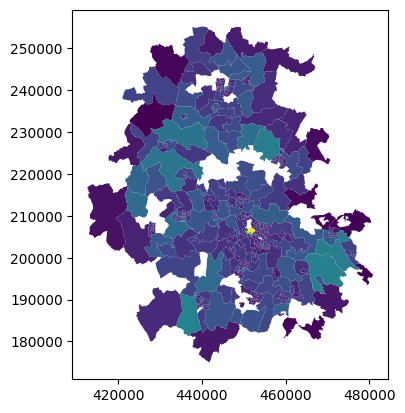

In [40]:
lsoa_df_smokers.plot(column='count')

## Challenge: Bonus exercises

### 1. Write your smoker df counts to a geojson file

In [41]:
lsoa_df_smokers.to_file('smoker_df_counts_lsoa.geojson')

###  2. Join your smoker counts dataframe to a dataframe of LSOA population counts, calculate the number of smokers per 1000 population, and plot the dataframe again

You can download the mid-year estimates from this webpage: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates

You will need to use the pandas read_excel method instead. You may wish to look up the arguments for that method on Google. You may need to specify the sheet, skip rows, or select a subset of columns.

In [44]:
mid_year_lsoa_pop_counts = pd.read_excel("sapelsoasyoatablefinal.xlsx", sheet_name='Mid-2022 LSOA 2021', skiprows=3)

In [45]:
mid_year_lsoa_pop_counts.head()

,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0,F1,F2,F3,F4,...,M81,M82,M83,M84,M85,M86,M87,M88,M89,M90
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,1866,15,3,12,13,5,...,6,6,3,3,3,3,2,1,3,1
1,E06000001,Hartlepool,E01011950,Hartlepool 008A,1094,6,5,8,8,4,...,1,1,1,2,0,0,0,0,0,0
2,E06000001,Hartlepool,E01011951,Hartlepool 007A,1240,8,7,5,8,3,...,1,1,3,1,2,2,1,0,1,0
3,E06000001,Hartlepool,E01011952,Hartlepool 002A,1620,14,11,17,15,15,...,0,3,1,2,3,3,4,3,0,13
4,E06000001,Hartlepool,E01011953,Hartlepool 002B,1979,9,12,18,11,13,...,3,4,3,2,0,1,0,0,1,4


In [52]:
lsoa_df_smokers_pop_counts = pd.merge(
    left=lsoa_df_smokers,
    right=mid_year_lsoa_pop_counts[['LSOA 2021 Code','Total']],
    left_on="LSOA21CD",
    right_on="LSOA 2021 Code",
    how="left")

lsoa_df_smokers_pop_counts.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,count,LSOA 2021 Code,Total
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104....",NaN,E01000001,1721
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572....",NaN,E01000002,1608
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071....",NaN,E01000003,1826
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842....",NaN,E01000005,1605
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118....",NaN,E01000006,1833


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b9a0342-1ee9-4024-886e-fd3cfaca1c00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [53]:
lsoa_df_smokers_pop_counts['counts_per_thousand'] = (
    (lsoa_df_smokers_pop_counts['count'] /
    lsoa_df_smokers_pop_counts['Total']) * 1000

)

In [59]:
lsoa_df_smokers_pop_counts.sort_values("counts_per_thousand", ascending=False)

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,count,LSOA 2021 Code,Total,counts_per_thousand
31484,E01033305,Vale of White Horse 006G,450451,197308,-1.27181,51.672291,{1FE6FE6C-7557-4C0A-B62C-5210D174C57C},"MULTIPOLYGON (((450122.699 197772.790, 450007....",208.0,E01033305,1304,159.509202
27328,E01028795,West Oxfordshire 002A,435224,229443,-1.48874,51.962360,{8B26B27F-AAFD-4AA3-8575-C7CC4DE31FB5},"MULTIPOLYGON (((432964.053 232823.984, 432857....",239.0,E01028795,1576,151.649746
27042,E01028486,Cherwell 009C,437539,233762,-1.45458,52.001041,{6A5B9625-3FB8-4EAE-B80B-C82416162751},"MULTIPOLYGON (((433932.781 236255.609, 433888....",189.0,E01028486,1254,150.717703
27348,E01028818,West Oxfordshire 010E,435781,209295,-1.48272,51.781181,{DBCCFED9-11B9-45FA-9BB6-84E8F1A63996},"MULTIPOLYGON (((436074.156 209769.360, 436038....",240.0,E01028818,1670,143.712575
27309,E01028776,West Oxfordshire 003B,432984,220820,-1.52216,51.884972,{E0B5A271-1785-4AD8-B11D-D73A7A5A39F5},"MULTIPOLYGON (((429010.213 226598.099, 428879....",241.0,E01028776,1913,125.980136
...,...,...,...,...,...,...,...,...,...,...,...,...
35667,W01002036,Vale of Glamorgan 005G,317939,172435,-3.18217,51.444931,{A5653C36-55A1-401D-8165-F8EAA2D8C258},"MULTIPOLYGON (((317734.974 172707.277, 317674....",NaN,W01002036,1500,NaN
35668,W01002037,Vale of Glamorgan 005H,318527,172406,-3.17371,51.444759,{50989A4B-683D-4BFB-88EB-EB065F77BC25},"MULTIPOLYGON (((319033.579 172604.209, 318949....",NaN,W01002037,1070,NaN
35669,W01002038,Vale of Glamorgan 014G,306491,167360,-3.34552,51.397530,{5D44E7EA-EA83-4556-86FF-B40DF05D7EA8},"MULTIPOLYGON (((306385.000 168776.000, 306215....",NaN,W01002038,1280,NaN
35670,W01002039,Vale of Glamorgan 014H,306564,166023,-3.34411,51.385529,{931B3CA2-0B2F-4BFA-85EC-055CEE49D2ED},"MULTIPOLYGON (((306820.271 166519.139, 306691....",NaN,W01002039,1865,NaN


<Axes: >

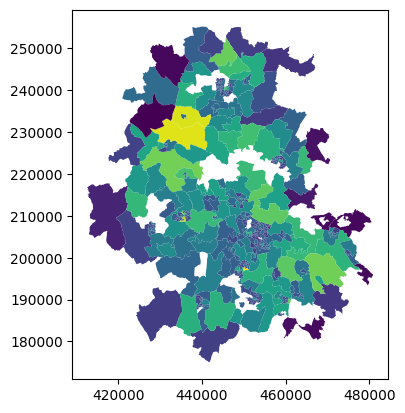

In [55]:
# plot counts per thousand
lsoa_df_smokers_pop_counts.plot(column='counts_per_thousand')

<Axes: >

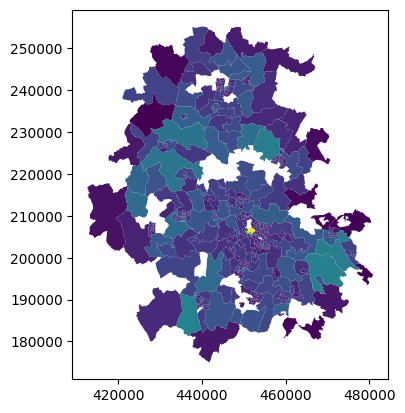

In [56]:
# Compare this with the original plot (raw counts)
lsoa_df_smokers.plot(column='count')